<a href="https://colab.research.google.com/github/fursew05/DOE/blob/main/%EC%8B%A4%ED%97%98%EA%B3%84%ED%9A%8D%EB%B2%95_4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factorial Design
$Y_{ijk} = \mu + \tau_{i} + β_{j} + \tau\beta_{k} + ϵ_{ijk} $
- 4장부터는 관심 있는 요인이 2개로 늘어나게 됩니다.(이전까지는 일원배치)
- A요인의 수준이 a개, B요인의 수준이 b개가 있다면 a*b만큼 반복하여 실험해야함
- 또한 각 요인의 영향(main effect)을 고려할 뿐만 아니라 두 요인간의 교호작용 요인도 고려해야함(interaction effect)
- 실험순서는 랜덤하게 진행(CRD와 같음)
- 각 조합에 대한 실험횟수가 1인 경우 anova 불가능, Tukey 사후 검정으로 진행(2장 참고)
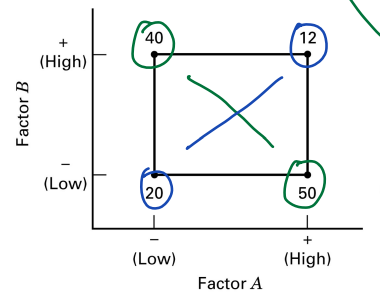

- 그림과 같이 y값을 봤을 때 A에 대한 main effect는
$\frac{12+50}{2}-\frac{40+20}{2} = 31-30 = 1$
- B에 대한 main effect는 $\frac{40+12}{2} - \frac{20+50}{2} = -9$
- A와 B 사이에 작용하는 interaction effect는 $\frac{40+50}{2} - \frac{20+12}{2} = 29$
- 즉 예시에서 나오는 실험데이터는 각 요인의 main effect보다 interaction effect가 더 크다는 것을 알 수 있음

## Factorial Design의 종류
- Full Factorial Design(완전요인배치) : 모든 요인에 대해서 각 수준을 모두 고려하여 실험을 진행함, 이때 요인의 수준이 모두 2개이면 2^k FFD가 됨
- Fractional Factorial Design(부분요인배치) : FFD의 경우에서 주로 나타나는 경우만 실험을 진행 (절반 또는 1/4만 진행)

## Factorial Design의 장점
- 기존 일원배치로 진행했을 때보다 더 많은 요인을 함께 고려하여 실험하므로 실험수가 줄어듬
- 여러 요인 간 작용하는 교호작용을 고려할 수 있음
- 교호작용을 고려함으로써 블록배치와 같이 MSE를 줄일 수 있게 되어 noise를 줄일 수 있고 정확도 높은 결론을 낼 수 있음(정확한 main effect 계산)

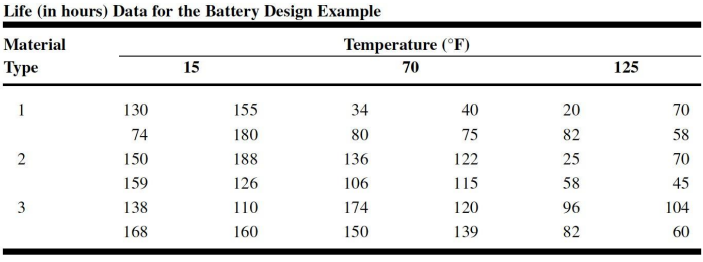

In [ ]:
# 예시 : Material Type 요인이 3개의 수준을 가지고 있고 Temperature 요인이 3개의 수준을 가지며 각 조합마다 4번씩
# 실험을 반복하면 -> 총 3*3*4 = 36번 수행

# 배터리의 수명이 배터리 타입과 온도가 영향을 줄것이라고 가정하고 이 둘의 main effect와 수명이 긴 배터리를 위한 요인의 조합은??

import pandas as pd

df = pd.DataFrame({
    "Material_Type":[1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3],
    "Temperature":[15,15,15,15,70,70,70,70,125,125,125,125,15,15,15,15,70,70,70,70,125,125,125,125,15,15,15,15,70,70,70,70,125,125,125,125],
    "Battery_life":[130,155,74,180,34,40,80,75,20,70,82,58,150,188,159,123,136,122,106,115,25,70,58,45,
                    138,110,168,160,174,120,150,139,96,104,82,60]
})
df

,Material_Type,Temperature,Battery_life
0,1,15,130
1,1,15,155
2,1,15,74
3,1,15,180
4,1,70,34
5,1,70,40
6,1,70,80
7,1,70,75
8,1,125,20
9,1,125,70


In [ ]:
# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Battery_life ~ C(Material_Type)*C(Temperature)",data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Material_Type),2.0,10667.3889,5333.6944,7.8198,2.0938e-03
C(Temperature),2.0,38883.3889,19441.6944,28.5038,2.2137e-07
C(Material_Type):C(Temperature),4.0,9566.1111,2391.5278,3.5063,1.9798e-02
Residual,27.0,18416.0000,682.0741,NaN,NaN


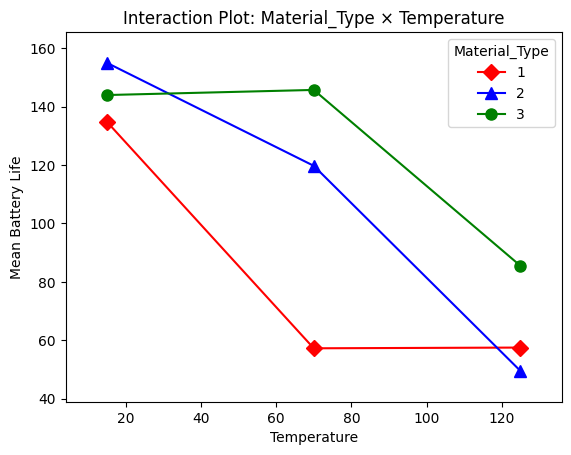

In [ ]:
# interaction plot
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(
    x=df["Temperature"],
    trace=df["Material_Type"],
    response=df["Battery_life"],
    colors=["red", "blue", "green"],
    markers=["D", "^", "o"],
    ms=8
)

plt.xlabel("Temperature")
plt.ylabel("Mean Battery Life")
plt.title("Interaction Plot: Material_Type × Temperature")
plt.show()

- C(Material_Type):C(Temperature)	는 interaction effect를 의미함
- 분산분석 결과 유의수준 5%에서 Material_Type과 Temperature의 main effect가 유의하다고 볼 수 있음
- Interaction plot은 각 조합의 관측 평균을 찍어서 시각화 한 것
- 선들이 평행하지 않고 교차점이 존재한다면 통계적으로 유의한 interaction이 있다는 것을 시사함
- plot을 통해서 Material Type이 2이면서 온도가 낮을 때 배터리 수명이 가장 길다는 것을 확인할 수 있음

### Factorial Design 일반화(요인이 3개 이상일때)
- 요인간의 교호작용을 똑같이 고려하여 진행
- 요인이 3개인 경우 SST = SS_a+SS_b+SS_c+SS_ab+SS_ac+SS_bc+SS_abc+SSE
- 3요인의 FFD 모형은 다음과 같다
$Y_{ijkl} = \mu + \tau_{i} + β_{j} + γ_{k} + \tauβ_{ij} + \tau\gamma_{ik} + \betaγ_{jk} + ϵ_{ijkl}$


## random effect 모형
- 실험 요인을 완벽하게 통제할 수 없는 경우 요인 값을 확률변수로 두어야함

(이전에 수행한 예시들은 모두 treatment 수준을 통제할 수 있는 fixed effect model)
- 일원배치 radon effect 모형은 다음과 같다
- $Y_{ij} = \mu + \tau_{i} + ϵ_{ij}이고,  \tau \sim N(0,\sigma_{\tau}^2), ϵ \sim N(0,σ^2)$


In [ ]:
import pandas as pd
df = pd.DataFrame(
    {'school':['A','A','A','A','A','A','B','B','B','B','B','B','C','C','C','C','C','C','D','D','D','D','D','D'],
     'score' : [84,90,76,62,72,81,75,85,91,98,82,75,72,76,74,85,77,60,88,98,70,95,86,80]}
)
df

,school,score
0,A,84
1,A,90
2,A,76
3,A,62
4,A,72
5,A,81
6,B,75
7,B,85
8,B,91
9,B,98


- 네 학교에서 무작위를 학생을 뽑았을 때 학교에 따른 성적 차이가 있는지 확인
- 즉, 학교라는 treatment에서 수준을 무작위로 골라서 main effect가 있는지 확인하는 것
- $H_{0}: \sigma_{\tau}^2=0$
- $H_{1}: \sigma_{\tau}^2>0$

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 6개 데이터 무작위 추출
sample_df = df.sample(n=6, random_state=42)

print("--- 무작위로 추출된 6개 데이터 ---")
print(sample_df)

# 3. Random Effect Model에 대한 ANOVA 수행, 샘플에 대해서만 진행!
model = ols('score ~ C(school)', data=sample_df).fit()

# anova_lm을 사용하여 분산 분석표 생성
# typ=1은 일원 분산 분석을 의미
anova_table = sm.stats.anova_lm(model, typ=1)

print("--- 분산 분석표 (ANOVA Table) ---")
print(anova_table)

--- 무작위로 추출된 6개 데이터 ---
   school  score
8       B     91
16      C     77
0       A     84
18      D     88
11      B     75
9       B     98
--- 분산 분석표 (ANOVA Table) ---
            df  sum_sq     mean_sq         F    PR(>F)
C(school)  3.0    99.5   33.166667  0.238609  0.864681
Residual   2.0   278.0  139.000000       NaN       NaN


- p값이 0.86으로 귀무가설을 기각할 수 없어 학교에 따른 점수 차이가 없다는 것을 확인할 수 있음

# Blocking in a Factorial Design
- A와 B 두 가지의 요인에만 관심이 있는 상태에서 block effect를 고려하는 경우 진행

- A의 수준이 a개, B의 수준이 b개, 블록의 수준이 n개인 경우 총 a*b*n 번의 실험이 진행되며 각 ab개의 배치마다 각 블록 수준이 할당됨.

- 모형 : $y_{ijk} = \mu + \tau_{i} + \beta_{j} + \tau\beta_{ij} + δ_{k} + \epsilon_{ijk}$

- 이 때 A,B는 fixed effect이고, 블록 효과는 random effect
$δ_{k} \sim N(0,\sigma_{\delta}^2)$

In [ ]:
data = pd.DataFrame(
    {'Operators_block' : [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4],
     'Filter_type' : [1,1,1,2,2,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1,1,2,2,2],
     'Ground_clutter' : ['Low','High','Medium','Low','High','Medium','Low','High','Medium',
                         'Low','High','Medium','Low','High','Medium','Low','High','Medium',
                         'Low','High','Medium','Low','High','Medium'],
     'target' : [90,102,114,86,87,93,96,106,112,84,90,91,100,105,108,
                 92,97,95,92,96,98,81,80,83]}
)
data

,Operators_block,Filter_type,Ground_clutter,target
0,1,1,Low,90
1,1,1,High,102
2,1,1,Medium,114
3,1,2,Low,86
4,1,2,High,87
5,1,2,Medium,93
6,2,1,Low,96
7,2,1,High,106
8,2,1,Medium,112
9,2,2,Low,84


In [ ]:
from statsmodels.stats.anova import anova_lm
model = ols("target ~ C(Filter_type)*C(Ground_clutter)+C(Operators_block)",data=data).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Filter_type),1.0,1066.666667,1066.666667,96.192385,6.446793e-08
C(Ground_clutter),2.0,335.583333,167.791667,15.131513,2.527013e-04
C(Operators_block),3.0,402.166667,134.055556,12.089178,2.771485e-04
C(Filter_type):C(Ground_clutter),2.0,77.083333,38.541667,3.475701,5.750655e-02
Residual,15.0,166.333333,11.088889,NaN,NaN


- 결과 해석


1.   Filter type과 Ground clutter의 main effect는 통계적으로 유의함
2.  interaction effect는 유의하지 않음

